# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [ ]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Machine Learning/Mini-project'
%cd $path
%pwd

Mounted at /content/drive
/content/drive/MyDrive/Machine Learning/Mini-project


'/content/drive/MyDrive/Machine Learning/Mini-project'

In [ ]:
## load dataset here
df = pd.read_csv("icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [ ]:
## parsing data here
images, labels = parse_data(df)

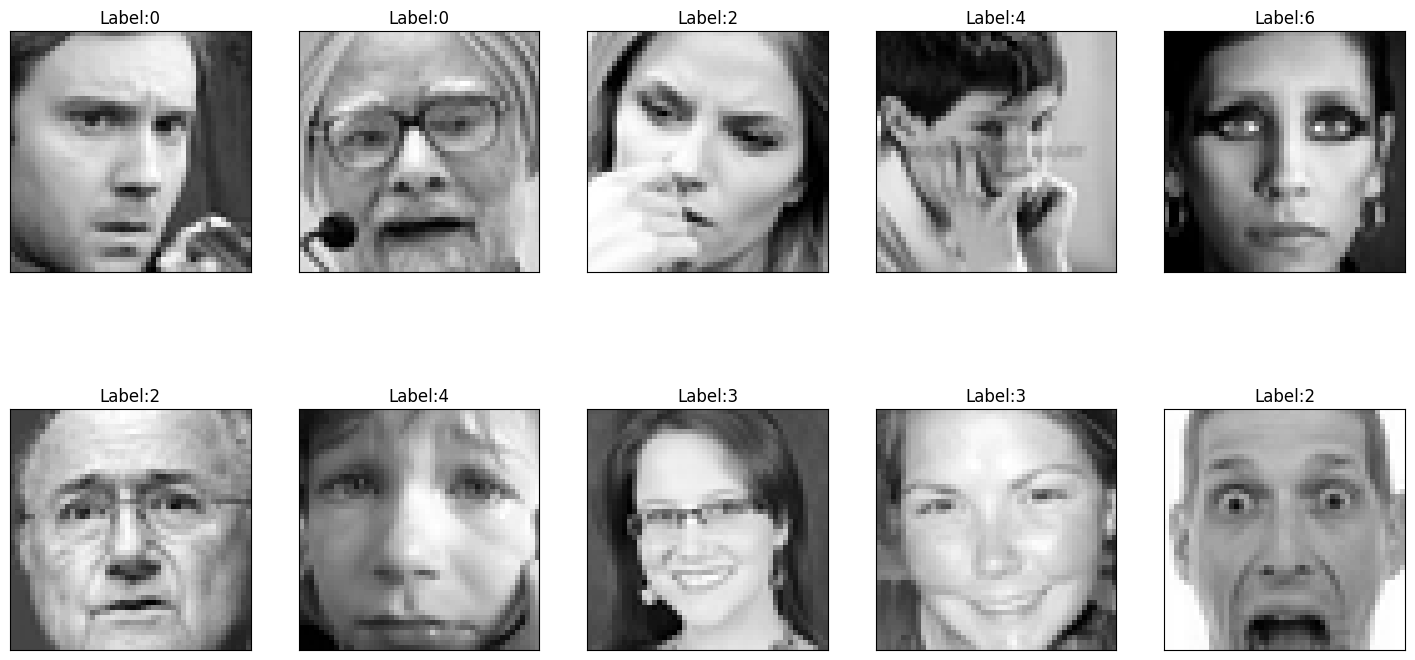

In [ ]:
## showing images here
show_img(images, labels)

In [ ]:
# Reshape hình ảnh thành mảng 2D, mỗi hàng là một hình ảnh
image2d = images.reshape(images.shape[0], -1)
# Tạo DataFrame từ hình ảnh đã được reshape
df = pd.DataFrame(image2d)

# Thêm cột nhãn vào DataFrame
df['label'] = labels

# Hiển thị DataFrame
print(df)

           0      1      2      3      4      5      6      7      8      9  \
0       70.0   80.0   82.0   72.0   58.0   58.0   60.0   63.0   54.0   58.0   
1      151.0  150.0  147.0  155.0  148.0  133.0  111.0  140.0  170.0  174.0   
2      231.0  212.0  156.0  164.0  174.0  138.0  161.0  173.0  182.0  200.0   
3       24.0   32.0   36.0   30.0   32.0   23.0   19.0   20.0   30.0   41.0   
4        4.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
35882   50.0   36.0   17.0   22.0   23.0   29.0   33.0   39.0   34.0   37.0   
35883  178.0  174.0  172.0  173.0  181.0  188.0  191.0  194.0  196.0  199.0   
35884   17.0   17.0   16.0   23.0   28.0   22.0   19.0   17.0   25.0   26.0   
35885   30.0   28.0   28.0   29.0   31.0   30.0   42.0   68.0   79.0   81.0   
35886   19.0   13.0   14.0   12.0   13.0   16.0   21.0   33.0   50.0   57.0   

       ...   2295   2296   2297   2298   2299   230

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Columns: 2305 entries, 0 to label
dtypes: float64(2304), int64(1)
memory usage: 631.1 MB


#1.1 Data analysis

<ipython-input-10-8f7e37de48f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=labels, palette='mako')


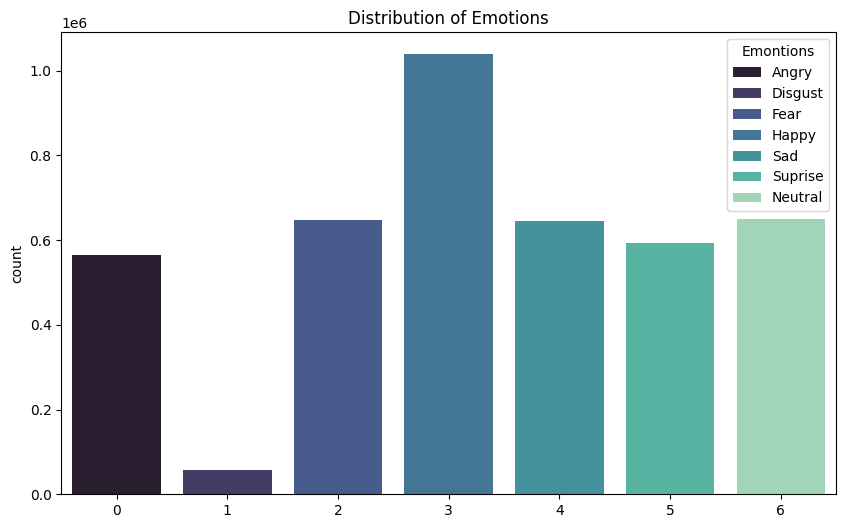

In [ ]:
class_label = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Suprise', 'Neutral']
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x=labels, palette='mako')
ax.legend(class_label, title= 'Emontions')
plt.title('Distribution of Emotions')
plt.show()

#1.2 Data preprocessing

In [ ]:
df.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
2300     0
2301     0
2302     0
2303     0
label    0
Length: 2305, dtype: int64

In [ ]:
df.duplicated().sum()

1793

In [ ]:
def preprocessing_data(df):
  # Xử lý dữ liệu rỗng bằng cách loại bỏ
  df = df.dropna()
  # Xử lý dữ liệu trùng bằng cách loại bỏ
  df = df.drop_duplicates()
  df = df
  return df

In [ ]:
df = preprocessing_data(df.copy())

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,label
0,70.0,80.0,82.0,72.0,58.0,58.0,60.0,63.0,54.0,58.0,...,182.0,183.0,136.0,106.0,116.0,95.0,106.0,109.0,82.0,0
1,151.0,150.0,147.0,155.0,148.0,133.0,111.0,140.0,170.0,174.0,...,108.0,95.0,108.0,102.0,67.0,171.0,193.0,183.0,184.0,0
2,231.0,212.0,156.0,164.0,174.0,138.0,161.0,173.0,182.0,200.0,...,138.0,152.0,122.0,114.0,101.0,97.0,88.0,110.0,152.0,2
3,24.0,32.0,36.0,30.0,32.0,23.0,19.0,20.0,30.0,41.0,...,126.0,132.0,132.0,133.0,136.0,139.0,142.0,143.0,142.0,4
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,34.0,31.0,31.0,31.0,27.0,31.0,30.0,29.0,30.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35881,181.0,177.0,176.0,156.0,178.0,144.0,136.0,132.0,122.0,107.0,...,155.0,156.0,107.0,31.0,53.0,74.0,60.0,28.0,55.0,0
35882,50.0,36.0,17.0,22.0,23.0,29.0,33.0,39.0,34.0,37.0,...,215.0,216.0,217.0,221.0,222.0,220.0,223.0,221.0,216.0,6
35883,178.0,174.0,172.0,173.0,181.0,188.0,191.0,194.0,196.0,199.0,...,141.0,136.0,118.0,66.0,7.0,0.0,0.0,0.0,0.0,3
35884,17.0,17.0,16.0,23.0,28.0,22.0,19.0,17.0,25.0,26.0,...,179.0,193.0,193.0,194.0,170.0,148.0,154.0,133.0,113.0,0


#1.3 Feature Enginerring

In [ ]:
import cv2
# Dữ liệu đầu vào là mảng 3D có kích thước (num_samples, height, width)
# Giảm chiều ảnh xuống còn kích thước 32x32
# Do đó ta sẽ giảm số lượng pixels đầu vào bằng cách resize nó
def feature_engineering(df, new_size = (32,32)):
    num_samples = df.shape[0]

    # Khởi tạo danh sách lưu trữ các ảnh đã resize
    resized_images = []

    # Với mỗi ảnh trong tập dữ liệu ta sẽ thực hiện resize
    # để từ 48x48 còn 32x32
    for i in range(num_samples):
      # Reshape dữ liệu từ df thành 48x48 để chuẩn bị cho việc resize
      image = df.iloc[i, :-1].values.reshape(48, 48)
      # Thực hiện resize ảnh thành kích thước mới bằng cv2
      resized_image = cv2.resize(image, new_size)
      # Thêm ảnh đã resize vào danh sách
      resized_images.append(resized_image)

      # Chuyển danh sách ảnh đã resize thành mảng numpy
    resized_images = np.array(resized_images)

    # Flatten các ảnh đã được resize để chuẩn bị cho DataFrame
    flattened_images = resized_images.reshape(num_samples, -1)

    # Tạo DataFrame mới từ các ảnh đã flatten
    df_resized_images = pd.DataFrame(flattened_images)

    # Thêm cột 'label' từ DataFrame gốc
    df_resized_images['label'] = df['label'].values

    return df_resized_images

In [ ]:
df_resized = feature_engineering(df)
df_resized

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,70.3750,75.8125,65.5625,59.9375,64.0000,58.7500,57.7500,61.3125,108.6250,127.5625,...,143.1875,140.1250,155.3125,184.8750,148.1250,105.8125,99.6250,104.1250,79.5625,0
1,150.6875,148.0625,152.1875,132.6875,123.2500,164.1250,176.1875,157.8125,156.0000,169.5000,...,140.5625,127.1875,108.8125,105.6250,105.0625,95.6875,152.3125,189.1250,184.2500,0
2,223.5625,166.1875,166.9375,148.1875,165.8125,179.8750,152.7500,47.3750,56.3125,130.1875,...,85.2500,59.5000,100.7500,138.6875,131.3750,108.7500,96.0000,91.3125,143.0625,2
3,26.3125,33.8125,31.2500,25.6250,19.6250,25.6250,34.1875,21.6250,30.0625,25.0000,...,140.8125,185.2500,181.1250,130.8750,135.0000,136.8750,141.1875,144.6875,144.3125,4
4,2.4375,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.1250,9.5000,24.3125,...,33.3750,0.0625,11.5000,33.5625,31.5000,29.9375,30.8750,30.4375,29.8750,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34089,180.8125,174.8125,162.1250,153.3125,135.7500,125.6250,119.5625,159.6875,172.5625,187.9375,...,114.1250,113.0625,132.5625,153.8125,131.3125,49.9375,62.6875,57.1250,50.0000,0
34090,44.9375,21.1250,22.4375,28.0625,35.1875,35.3750,37.0625,37.0625,40.0625,47.0000,...,66.2500,131.1875,215.7500,214.8125,216.6875,221.3125,220.1875,221.9375,215.5625,6
34091,177.8125,173.8750,176.5625,187.0625,192.8125,196.1875,200.0625,201.5625,205.2500,204.1250,...,171.9375,164.1250,150.4375,141.0000,126.7500,63.9375,5.2500,0.0000,0.0000,3
34092,17.1875,16.2500,23.6250,23.6250,19.0625,22.8125,25.3125,24.1875,26.5000,24.6250,...,162.6250,185.9375,197.7500,188.0625,197.0625,191.5000,160.7500,155.5000,132.2500,0


In [ ]:
## parsing data here
images_resized = df_resized.iloc[:, :-1].values
labels_resized  = df_resized['label'].values

In [ ]:
images_resized.shape

(34094, 1024)

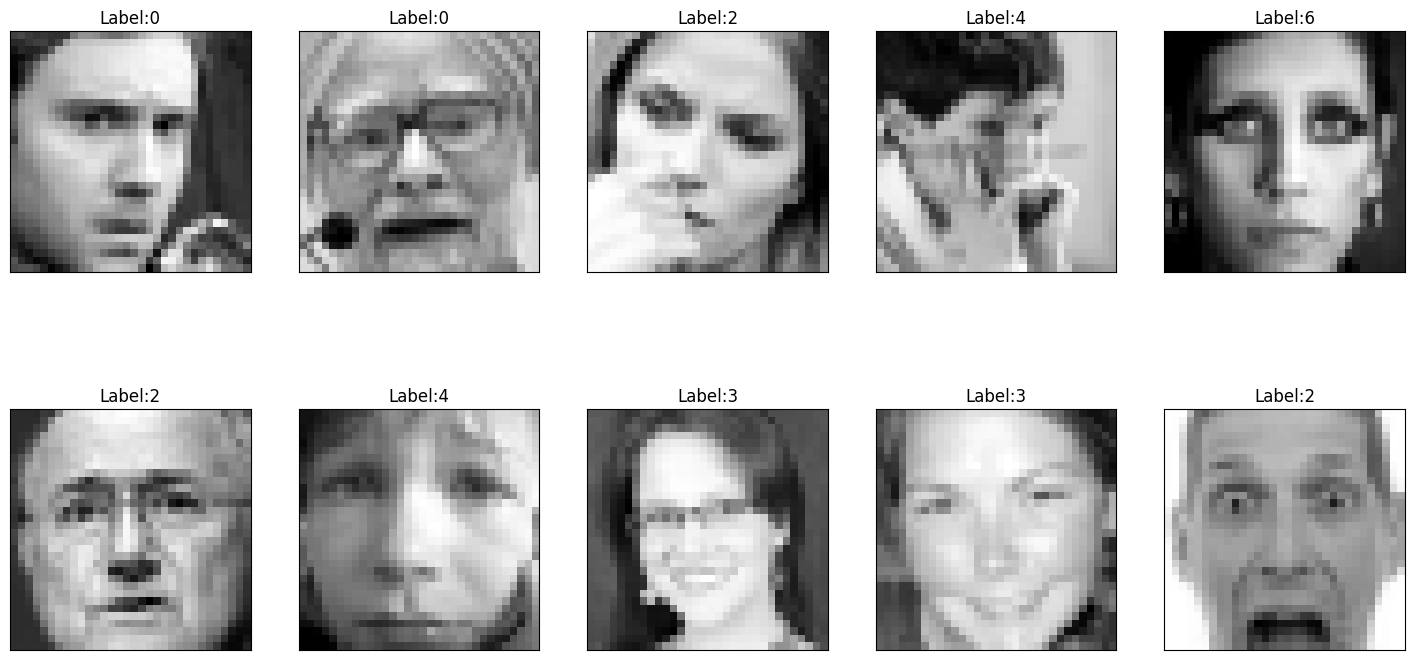

In [ ]:
# showing images here
show_img(images_resized.reshape(images_resized.shape[0], 32, 32), labels_resized)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [ ]:
from sklearn.decomposition import PCA
## modify images' array to the appropriate shape
# Reshape images vì images có shape (n_samples, width, height), cần reshape về (n_samples, width*height)
images_2d = images.reshape(images.shape[0], -1)
pca=PCA(n_components=2)
# pca.fit(images) ## modify images' array to the appropriate shape
pca.fit(images_2d)
# pca.fit(images) ## modify images' array to the appropriate shape

PCA(n_components=2)

In [ ]:
## transform for visualizing here
images_pca=pca.transform(images_2d) ## modify images' array to the appropriate shape
images_pca.shape

(35887, 2)

In [ ]:
pca_df = pd.DataFrame(images_pca, columns=["pca1", "pca2"])
pca_df['label'] = labels
pca_df

,pca1,pca2,label
0,691.750859,-442.328652,0
1,-62.025489,561.762209,0
2,-1322.538070,-415.729681,2
3,-232.277887,656.803931,4
4,1796.585834,-2005.093948,6
...,...,...,...
35882,3033.753533,481.233808,6
35883,-2074.831840,167.194815,3
35884,-1289.155652,-1408.568324,0
35885,2008.413571,-125.610909,3


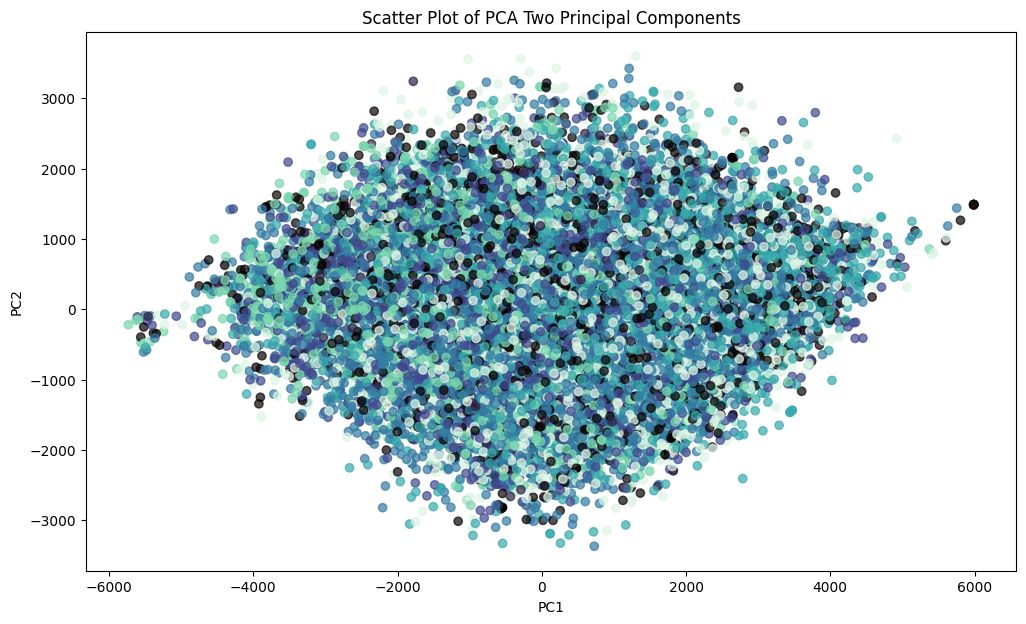

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca_df['pca1'], pca_df['pca2'], c=pca_df['label'], cmap='mako', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PCA Two Principal Components')
plt.show()

**Answer quesion 1:**
Với bộ dữ liệu gốc có dạng 3 chiều (n_samples, width, height), việc trực quan hóa trực tiếp trên dữ liệu này là không thể, do không thể biểu diễn dữ liệu 3D trên không gian 2D. Vì thế ta thực hiện việc *reshape* dữ liệu từ 3 chiều xuống 2 chiều (n_samples, width*height), chuyển dữ liệu ảnh sang dạng vector. \

Tiếp theo, chúng ta áp dụng thuật toán PCA (Principal Component Analysis) để thực hiện giảm kích thước dữ liệu, giữ lại thông tin quan trọng nhất và bỏ đi những thông tin không cần thiết hoặc ít quan trọng. Trong trường hợp này, PCA được sử dụng để giảm dữ liệu từ 2 chiều xuống còn 2 thành phần chính. \

Mặc dù việc áp dụng thuật toán PCA để giảm còn 2 thành phần chính vẫn trực quan hóa được dữ liệu, nhưng nó không thể hiện rõ ràng được các lớp dữ liệu khác nhau trong tập dữ liệu. Do đó, 2 principal components không tối ưu trên dữ liệu này.

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

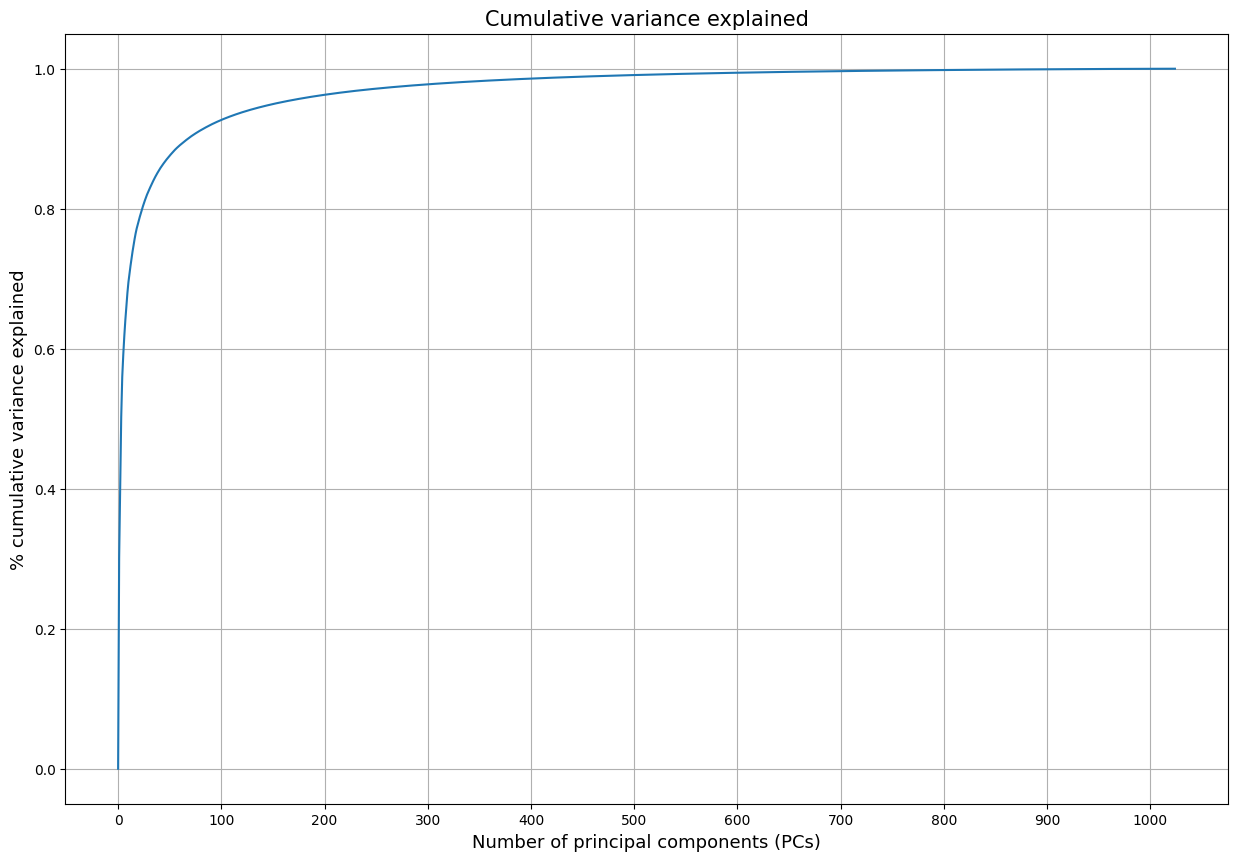

In [ ]:
## determine the optimal number of PCs here
## pca.explained_variance_()
# determine the optimal number of PCs here
X = images_resized
n_components = X.shape[1]
# Chạy PCA với tất cả thành phần
pca = PCA(n_components=n_components, random_state = 42)
X_pca = pca.fit_transform(X)
# vẽ biểu đồ phương sai thực nghiệm được giải thích trên tất cả các thành phần
# bắt đầu phương sai được giải thích ở mức 0
exp_variance = np.insert(pca.explained_variance_ratio_, 0, 0)

# vẽ biểu đồ phương sai
figure = plt.figure(figsize=(15, 10))

plt.plot(np.cumsum(exp_variance)) #cumsum() tính tổng tích lũy của các phần tử mảng trên một trục nhất định.
plt.xticks(range(0, n_components, 100))
plt.xlabel("Number of principal components (PCs)", size=13)
plt.ylabel("% cumulative variance explained", size=13)
plt.title("Cumulative variance explained", size=15)
plt.grid(True)
plt.show()

In [ ]:
cumulative_variance = np.cumsum(exp_variance)
n_components = np.arange(50, 201, 5)

for n in n_components:
    explained_variance_ratio = cumulative_variance[n]
    if explained_variance_ratio >= 0.90:
        print(f"n = {n} explains at least 90% of the variance.")
    else:
        print(f"n = {n} does not explain at least 90% of the variance.")


n = 50 does not explain at least 90% of the variance.
n = 55 does not explain at least 90% of the variance.
n = 60 does not explain at least 90% of the variance.
n = 65 does not explain at least 90% of the variance.
n = 70 explains at least 90% of the variance.
n = 75 explains at least 90% of the variance.
n = 80 explains at least 90% of the variance.
n = 85 explains at least 90% of the variance.
n = 90 explains at least 90% of the variance.
n = 95 explains at least 90% of the variance.
n = 100 explains at least 90% of the variance.
n = 105 explains at least 90% of the variance.
n = 110 explains at least 90% of the variance.
n = 115 explains at least 90% of the variance.
n = 120 explains at least 90% of the variance.
n = 125 explains at least 90% of the variance.
n = 130 explains at least 90% of the variance.
n = 135 explains at least 90% of the variance.
n = 140 explains at least 90% of the variance.
n = 145 explains at least 90% of the variance.
n = 150 explains at least 90% of the v

**Answer question 2:** Dựa vào biểu đồ trên suy ra ta chọn n = 70 là số lượng thành phần chính tốt nhất để biểu diễn PCA vì có thể được sử dụng để biểu thị phương sai 90%. Ta chạy lại model PCA với n_components = 70:

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=70, random_state=42)
pca.fit(images_resized) ## modify images' array to the appropriate shape
## transform
images_pca=pca.transform(images_resized) ## modify images' array to the appropriate shape
images_pca.shape

(34094, 70)

In [ ]:
df_pca = pd.DataFrame(images_pca)
df_pca['label'] = labels_resized
df_pca

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,label
0,444.506309,-272.853375,-591.502945,265.043513,-339.487254,84.936626,66.186640,-36.862799,49.181110,107.618920,...,62.748314,-57.076831,94.461161,7.650382,123.986860,-132.623692,25.698451,18.313056,-2.438292,0
1,-55.969297,358.985271,385.416219,300.705350,-462.609504,73.780207,312.797169,110.851628,-56.862327,122.854901,...,-20.455537,0.996810,-8.270391,2.031604,-35.354751,-13.221421,47.984509,80.262488,-42.826746,0
2,-904.289794,-220.437045,-1298.867066,-175.515535,-543.322109,-631.337564,-726.322659,183.357439,-187.219976,-44.133760,...,96.935069,-66.388892,-49.442214,-44.394834,-91.554384,57.478852,93.125178,125.250308,-180.049985,2
3,-173.639145,388.195379,954.735639,-954.882515,475.887664,-34.997954,-636.731862,-430.115743,-201.226985,-173.599356,...,185.535578,-11.011359,37.475145,-75.517905,54.679896,-3.848331,-39.032695,70.190884,23.978115,4
4,1179.855980,-1340.744056,142.016902,-1.123919,-238.820935,-460.915838,-23.341069,-16.261538,209.214310,410.097711,...,-46.106113,34.117877,-49.070473,-96.732198,-50.611596,-41.139708,16.298935,-28.266366,-41.358190,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34089,-1200.894636,-144.958758,273.751226,771.791882,151.327034,-6.696954,-63.024011,-258.131785,254.774168,272.061834,...,14.188527,56.583405,59.503969,87.039896,-17.462162,-63.266775,-37.405904,61.634193,44.777930,0
34090,2005.446796,273.106425,858.367960,-193.187718,-439.353494,315.611381,369.528402,96.022423,-152.416784,-39.352787,...,-48.609250,13.930403,27.314867,25.346949,47.183279,41.470843,47.513471,59.526678,-28.480681,6
34091,-1401.273808,121.656645,-203.548013,184.057861,226.790429,-53.186391,21.105708,-267.530862,-57.725427,-126.450158,...,172.076313,-71.022125,-23.810185,-55.830817,-3.505677,-41.859106,33.040616,-27.891532,2.604175,3
34092,-874.877632,-959.582004,231.481696,-725.648185,548.049656,246.935704,22.948165,-0.750934,160.401320,-511.816184,...,-3.987728,40.106003,-38.533394,48.333588,-121.568155,-90.009414,-102.805902,124.178159,52.099410,0


## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

> # **Original data:**
Nhóm sẽ train các model: MLP, Decision Tree, kNN và Naive Bayes trên tập dữ liệu gốc đã được resize (32x32).

* ### Prepare data to analyze

In [ ]:
# Chuẩn bị dữ liệu X và y
def prepare_X_y(df):
    # Lấy các giá trị của cột 'pixels' và chuyển thành mảng numpy 2D
    X = df.drop(columns = 'label').values
    y = df['label'].values
    return X, y

X, y = prepare_X_y(df_resized)

* ### Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

# Bước 1: Chia data thành tập training+validation và tập test theo tỉ lệ 80-20
X_temp_1, X_test_1, y_temp_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Bước 2: Chia tập training+validation thành tập training và tập validation theo tỉ lệ 80-20
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.2, random_state=42)

print('Training:' + str(X_train_1.shape))
print('Validation:' + str(X_val_1.shape))
print('Test:' + str(X_test_1.shape))

Training:(21820, 1024)
Validation:(5455, 1024)
Test:(6819, 1024)


# Apply MLP model:

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

mlp = MLPClassifier()
scaler = MinMaxScaler()
pipeline = make_pipeline(scaler, mlp)
pipeline.fit(X_train_1, y_train_1) #fit model với tham số default

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('mlpclassifier', MLPClassifier())])

In [ ]:
from sklearn.metrics import classification_report

pred = pipeline.predict(X_val_1)
print(classification_report(y_val_1, pred))

              precision    recall  f1-score   support

           0       0.29      0.01      0.02       759
           1       0.00      0.00      0.00        63
           2       0.21      0.27      0.24       773
           3       0.37      0.82      0.51      1381
           4       0.30      0.23      0.26       992
           5       0.38      0.15      0.21       508
           6       0.34      0.13      0.18       979

    accuracy                           0.33      5455
   macro avg       0.27      0.23      0.20      5455
weighted avg       0.31      0.33      0.27      5455



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* ### Sử dụng GridSearchCV tìm ra tham số tốt nhất:

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
# Chọn các parameters để tiến hành fine_tune
param_grid= {'hidden_layer_sizes':  [(20,), (30,), (50,), (100,)],
            'activation': ['relu', 'tanh', 'logistic'],
            'solver': ['sgd', 'adam'],
            'learning_rate': ['constant', 'invscaling', 'adaptive']
            }
# Áp dụng với các parameter khác nhau
mlp_model =  make_pipeline(MinMaxScaler(),GridSearchCV(MLPClassifier(max_iter=300, tol=1e-4, early_stopping=True) , param_grid, cv = 5, scoring = 'f1_macro',verbose = 1, n_jobs = -1))

In [ ]:
mlp_model.fit(X_train_1, y_train_1)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=MLPClassifier(early_stopping=True,
                                                      max_iter=300),
                              n_jobs=-1,
                              param_grid={'activation': ['relu', 'tanh',
                                                         'logistic'],
                                          'hidden_layer_sizes': [(20,), (30,),
                                                                 (50,),
                                                                 (100,)],
                                          'learning_rate': ['constant',
                                                            'invscaling',
                                                            'adaptive'],
                                          'solver': ['sgd', 'adam']},
                              scoring='f1_macro', verbose=1))])

In [ ]:
# Tham số tốt nhất đối với mô hình
best_params = mlp_model[1].best_params_
print(best_params)

{'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}


* ### Tinh chỉnh mô hình với tham số tốt nhất trên tập train:

In [ ]:
mlp_model_1 = make_pipeline(MinMaxScaler(), MLPClassifier(**best_params, max_iter = 1000))
mlp_model_1.fit(X_train_1, y_train_1)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', learning_rate='adaptive',
                               max_iter=1000))])

 # Apply Decision tree:

* ### Huấn luyện trên tập train:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier()
dtr.fit(X_train_1, y_train_1) #fit model với tham số default

DecisionTreeClassifier()

In [ ]:
print(classification_report(y_val_1, dtr.predict(X_val_1)))

              precision    recall  f1-score   support

           0       0.17      0.16      0.16       759
           1       0.06      0.08      0.07        63
           2       0.20      0.21      0.21       773
           3       0.40      0.39      0.40      1381
           4       0.22      0.20      0.21       992
           5       0.23      0.24      0.23       508
           6       0.25      0.26      0.26       979

    accuracy                           0.26      5455
   macro avg       0.22      0.22      0.22      5455
weighted avg       0.26      0.26      0.26      5455



* ### Dùng GridSearchCV để tìm tham số tốt nhất:

In [ ]:
# Chọn parameter để fine tune
param_grid = {'criterion' : ['gini', 'entropy'],
              'splitter' : ['best'],
               'max_depth' : [None, 10, 20],
               'min_samples_leaf'  : [5, 10, 20, 100],
               'max_features' : ['sqrt', 'log2'],
               'class_weight' : [None, 'balanced']
               }
decision_tree_model = make_pipeline(GridSearchCV(DecisionTreeClassifier(),
                                                 param_grid, cv = 5,
                                                 scoring = 'f1_macro',
                                                 verbose = 1, n_jobs = -1))

In [ ]:
# fit mô hình lên dữ liệu gốc
decision_tree_model.fit(X_train_1, y_train_1)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


Pipeline(steps=[('gridsearchcv',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              n_jobs=-1,
                              param_grid={'class_weight': [None, 'balanced'],
                                          'criterion': ['gini', 'entropy'],
                                          'max_depth': [None, 10, 20],
                                          'max_features': ['sqrt', 'log2'],
                                          'min_samples_leaf': [5, 10, 20, 100],
                                          'splitter': ['best']},
                              scoring='f1_macro', verbose=1))])

In [ ]:
# Tìm tham số tốt nhất của mô hình
best_params = decision_tree_model.named_steps['gridsearchcv'].best_params_
print(best_params)

{'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'splitter': 'best'}


* ### Tinh chỉnh mô hình với tham số tốt nhất trên tập train:

In [ ]:
dtr_model_1 = make_pipeline(DecisionTreeClassifier(**best_params))
dtr_model_1.fit(X_train_1, y_train_1)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                                        min_samples_leaf=20))])

# Apply kNN model:

* ### Huấn luyện trên tập train:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_1, y_train_1) #fit model với tham số default

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_val_1, knn.predict(X_val_1)))

              precision    recall  f1-score   support

           0       0.24      0.26      0.25       759
           1       0.13      0.22      0.17        63
           2       0.25      0.23      0.24       773
           3       0.36      0.46      0.41      1381
           4       0.31      0.23      0.26       992
           5       0.34      0.21      0.26       508
           6       0.29      0.30      0.30       979

    accuracy                           0.30      5455
   macro avg       0.27      0.27      0.27      5455
weighted avg       0.30      0.30      0.30      5455



* ### Dùng GridSearchCV để tìm tham số tốt nhất:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Chọn các parameters để tiến hành fine_tune
param_grid = {'n_neighbors': [6],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]} # 1: L1 Norm, 2: L2 Norm

knn_model = make_pipeline(MinMaxScaler(),
                                    GridSearchCV(KNeighborsClassifier(),
                                                 param_grid, cv = 5,
                                                 scoring = 'accuracy',
                                                 verbose = 1, n_jobs = -1))


In [ ]:
knn_model.fit(X_train_1, y_train_1)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [6], 'p': [1, 2],
                                          'weights': ['uniform', 'distance']},
                              scoring='accuracy', verbose=1))])

* ### Tinh chỉnh mô hình với tham số tốt nhất trên tập train:

In [ ]:
# Tham số tốt nhất của mô hình
best_params = knn_model[1].best_params_
print(best_params)

{'algorithm': 'auto', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}


In [ ]:
knn_model_1 = make_pipeline(
    MinMaxScaler(),
    KNeighborsClassifier(**best_params)
)
knn_model_1.fit(X_train_1, y_train_1)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=6, p=1, weights='distance'))])

# Apply Naive Bayes model:

* ### Huấn luyện trên tập train:

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_1, y_train_1) #fit model với tham số default

GaussianNB()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val_1, nb_model.predict(X_val_1)))

              precision    recall  f1-score   support

           0       0.26      0.04      0.08       759
           1       0.02      0.27      0.04        63
           2       0.25      0.06      0.09       773
           3       0.39      0.18      0.24      1381
           4       0.25      0.34      0.29       992
           5       0.16      0.56      0.24       508
           6       0.24      0.15      0.19       979

    accuracy                           0.20      5455
   macro avg       0.22      0.23      0.17      5455
weighted avg       0.27      0.20      0.19      5455



* ### Dùng GridSearchCV để tìm tham số tốt nhất:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Chọn các parameters để tiến hành fine_tune
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}


nb_model = make_pipeline(StandardScaler(),
                        GridSearchCV(GaussianNB(),
                                     param_grid, cv = 5,
                                     scoring = 'accuracy',
                                     verbose = 1, n_jobs = -1))

In [ ]:
nb_model.fit(X_train_1, y_train_1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
                              param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                              scoring='accuracy', verbose=1))])

In [ ]:
best_params = nb_model.named_steps['gridsearchcv'].best_params_
print(best_params)

{'var_smoothing': 0.0001519911082952933}


* ### Tinh chỉnh mô hình với thông số tốt nhất trên tập train:

In [ ]:
naive_model_1 = make_pipeline(StandardScaler(), GaussianNB(**best_params))
naive_model_1.fit(X_train_1, y_train_1)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb',
                 GaussianNB(var_smoothing=0.0001519911082952933))])

> # **Transformed data:**
Ta chạy lại 4 model gồm: MLP, Decision Tree, kNN, Naive Bayes trên tập data đã giảm chiều bằng PCA với n_components = 70.

* ### Prepare data to apply model:

In [ ]:
X, y = prepare_X_y(df_pca)

* ### Train-test split:

In [ ]:
# Bước 1: Chia data thành tập training+validation và tập test theo tỉ lệ 80-20
X_temp_2, X_test_2, y_temp_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Bước 2: Chia tập training+validation thành tập training và tập validation theo tỉ lệ 80-20
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.2, random_state=42)

print('Training:' + str(X_train_2.shape))
print('Validation:' + str(X_val_2.shape))
print('Test:' + str(X_test_2.shape))

Training:(21820, 70)
Validation:(5455, 70)
Test:(6819, 70)


## Apply MLP model:

* ### Huấn luyện mô hình trên tập train:

In [ ]:
mlp_model.fit(X_train_2, y_train_2)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=MLPClassifier(early_stopping=True,
                                                      max_iter=300),
                              n_jobs=-1,
                              param_grid={'activation': ['relu', 'tanh',
                                                         'logistic'],
                                          'hidden_layer_sizes': [(20,), (30,),
                                                                 (50,),
                                                                 (100,)],
                                          'learning_rate': ['constant',
                                                            'invscaling',
                                                            'adaptive'],
                                          'solver': ['sgd', 'adam']},
                              scoring='f1_macro', verbose=1))])

In [ ]:
# Tham số tốt nhất của mô hình
best_params = mlp_model[1].best_params_
print(best_params)

{'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}


* ### Tinh chỉnh mô hình với tập train:


In [ ]:
# Tạo lại pipeline mới cho mô hình với tham số tốt nhất
mlp_model_2 = make_pipeline(MinMaxScaler(), MLPClassifier(**best_params, max_iter = 1000))
mlp_model_2.fit(X_train_2, y_train_2)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', learning_rate='adaptive',
                               max_iter=1000))])

# Apply Decision tree:

* ### Huấn luyện trên tập train:

In [ ]:
decision_tree_model.fit(X_train_2, y_train_2)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


Pipeline(steps=[('gridsearchcv',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              n_jobs=-1,
                              param_grid={'class_weight': [None, 'balanced'],
                                          'criterion': ['gini', 'entropy'],
                                          'max_depth': [None, 10, 20],
                                          'max_features': ['sqrt', 'log2'],
                                          'min_samples_leaf': [5, 10, 20, 100],
                                          'splitter': ['best']},
                              scoring='f1_macro', verbose=1))])

In [ ]:
# Tìm tham số tốt nhất của mô hình
best_params = decision_tree_model.named_steps['gridsearchcv'].best_params_
print(best_params)

{'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'splitter': 'best'}


* ### Tinh chỉnh mô hình với tham số tốt nhất trên tập train:

In [ ]:
dtr_model_2 = make_pipeline(DecisionTreeClassifier(**best_params))
dtr_model_2.fit(X_train_2, y_train_2)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=20, max_features='sqrt',
                                        min_samples_leaf=5))])

# Apply kNN model

* ### Huấn luyện trên tập train:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
param_grid = {'n_neighbors': [6],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]} # 1: L1 Norm, 2: L2 Norm

knn_model = make_pipeline(MinMaxScaler(),
                                    GridSearchCV(KNeighborsClassifier(),
                                                 param_grid, cv = 5,
                                                 scoring = 'accuracy',
                                                 verbose = 1, n_jobs = -1))

In [ ]:
knn_model.fit(X_train_2, y_train_2)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [6], 'p': [1, 2],
                                          'weights': ['uniform', 'distance']},
                              scoring='accuracy', verbose=1))])

In [ ]:
# Tìm tham số tốt nhất của mô hình
best_params = knn_model.named_steps['gridsearchcv'].best_params_
print(best_params)

{'algorithm': 'kd_tree', 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}


* ### Tinh chỉnh mô hình với tham số tốt nhất trên tập train:

In [ ]:
knn_model_2 = make_pipeline(KNeighborsClassifier(**best_params))
knn_model_2.fit(X_train_2, y_train_2)

Pipeline(steps=[('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='kd_tree', n_neighbors=6,
                                      weights='distance'))])

# Apply Naive Bayes model:

* ### Huấn luyện trên tập train:

In [ ]:
nb_model.fit(X_train_2, y_train_2)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
                              param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                              scoring='accuracy', verbose=1))])

In [ ]:
best_params = nb_model.named_steps['gridsearchcv'].best_params_
print(best_params)

{'var_smoothing': 0.1873817422860384}


* ### Tinh chỉnh mô hình với tham số tốt nhất trên tập train:

In [ ]:
naive_model_2 = make_pipeline(StandardScaler(), GaussianNB(**best_params))
naive_model_2.fit(X_train_2, y_train_2)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB(var_smoothing=0.1873817422860384))])

# 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [ ]:
## visualize the confusion matrices and classification reports here
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
def calculate_performance(y_true, y_pred, class_names):

    # Classification report
    print('Precision', precision_score(y_true, y_pred, average = None))
    print('Recall', recall_score(y_true, y_pred, average = None))
    print('Accuracy', accuracy_score(y_true, y_pred))
    print('F1', f1_score(y_true, y_pred, average = None))
    print('Classification report: \n', classification_report(y_true, y_pred))
    print('Confusion matrix: \n', confusion_matrix(y_true, y_pred))

    # Visualize the confusion matrices
    cm = confusion_matrix(y_true, y_pred)

    displ = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= class_names)
    displ.plot(cmap = plt.cm.cividis)
    plt.show()

    # The main score, which is the score we need to care the most
    main_score = f1_score(y_true, y_pred, average = 'macro') # để lựa chọn mô hình nào là tốt nhất
                                                             # ta dựa vào điểm F1
                                                             # do điểm F1 là điểm dung hòa
                                                             # giữa recall và precision
    return main_score

> # MLP model:

## Original data:

Precision [0.23941068 0.11764706 0.26315789 0.55973266 0.3126615  0.36666667
 0.32515895]
Recall [0.34255599 0.0952381  0.21992238 0.48515568 0.24395161 0.43307087
 0.36567926]
Accuracy 0.35307057745187903
F1 [0.28184282 0.10526316 0.23960536 0.51978278 0.27406569 0.39711191
 0.34423077]
Classification report: 
               precision    recall  f1-score   support

           0       0.24      0.34      0.28       759
           1       0.12      0.10      0.11        63
           2       0.26      0.22      0.24       773
           3       0.56      0.49      0.52      1381
           4       0.31      0.24      0.27       992
           5       0.37      0.43      0.40       508
           6       0.33      0.37      0.34       979

    accuracy                           0.35      5455
   macro avg       0.31      0.31      0.31      5455
weighted avg       0.36      0.35      0.35      5455

Confusion matrix: 
 [[260  11  93  86 108  60 141]
 [ 22   6   7   8   6   6   8]
 [142  

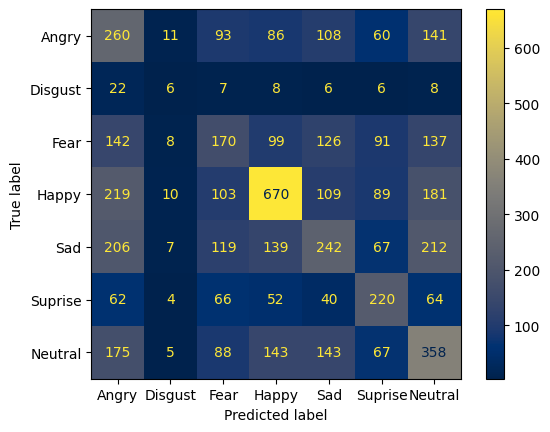

0.3088432110437872

In [ ]:
mlp_pred_1 = mlp_model_1.predict(X_val_1)
display(calculate_performance(y_val_1, mlp_pred_1, class_label))

## Transformed data:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Precision [0.22611465 0.         0.24102564 0.41964286 0.36061947 0.42995169
 0.32339657]
Recall [0.18708827 0.         0.12160414 0.7487328  0.16431452 0.3503937
 0.36567926]
Accuracy 0.3609532538955087
F1 [0.20475847 0.         0.1616509  0.53784135 0.22576177 0.38611714
 0.34324065]
Classification report: 
               precision    recall  f1-score   support

           0       0.23      0.19      0.20       759
           1       0.00      0.00      0.00        63
           2       0.24      0.12      0.16       773
           3       0.42      0.75      0.54      1381
           4       0.36      0.16      0.23       992
           5       0.43      0.35      0.39       508
           6       0.32      0.37      0.34       979

    accuracy                           0.36      5455
   macro avg       0.29      0.28      0.27      5455
weighted avg       0.34      0.36      0.33      5455

Confusion matrix: 
 [[ 142    0   50  305   72   38  152]
 [  11    0   10   26    3    5  

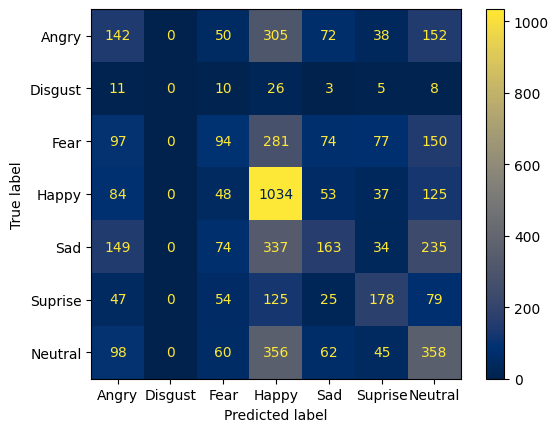

0.26562432689179793

In [ ]:
mlp_pred_2 = mlp_model_2.predict(X_val_2)
display(calculate_performance(y_val_2, mlp_pred_2, class_label))

> # Decision tree:

## Original Data:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Precision [0.20689655 0.         0.19078947 0.38034398 0.24876604 0.30412371
 0.26373626]
Recall [0.08695652 0.         0.15006468 0.56046343 0.25403226 0.23228346
 0.29417773]
Accuracy 0.29587534372135654
F1 [0.12244898 0.         0.16799421 0.45316159 0.25137157 0.26339286
 0.27812651]
Classification report: 
               precision    recall  f1-score   support

           0       0.21      0.09      0.12       759
           1       0.00      0.00      0.00        63
           2       0.19      0.15      0.17       773
           3       0.38      0.56      0.45      1381
           4       0.25      0.25      0.25       992
           5       0.30      0.23      0.26       508
           6       0.26      0.29      0.28       979

    accuracy                           0.30      5455
   macro avg       0.23      0.23      0.22      5455
weighted avg       0.27      0.30      0.28      5455

Confusion matrix: 
 [[ 66   0  74 243 168  55 153]
 [  4   0  10  24  10   5  10]
 [ 50  

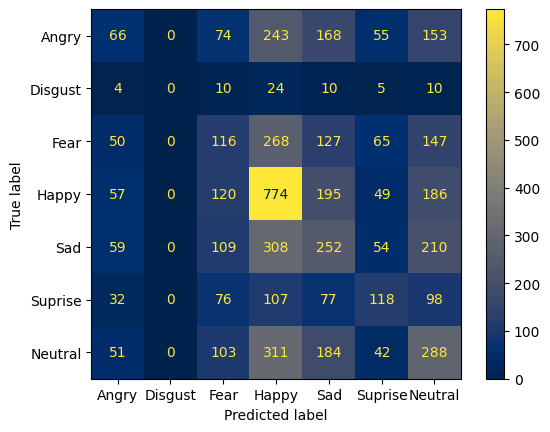

0.21949938804886537

In [ ]:
dtr_pred_1 = dtr_model_1.predict(X_val_1)
display(calculate_performance(y_val_1, dtr_pred_1, class_label))

## Transformed data:

Precision [0.16666667 0.02380952 0.17857143 0.33267717 0.21395881 0.23918575
 0.23462415]
Recall [0.19235837 0.01587302 0.20051746 0.36712527 0.18850806 0.18503937
 0.21041879]
Accuracy 0.23758020164986252
F1 [0.17859327 0.01904762 0.1889092  0.34905336 0.20042872 0.20865705
 0.22186322]
Classification report: 
               precision    recall  f1-score   support

           0       0.17      0.19      0.18       759
           1       0.02      0.02      0.02        63
           2       0.18      0.20      0.19       773
           3       0.33      0.37      0.35      1381
           4       0.21      0.19      0.20       992
           5       0.24      0.19      0.21       508
           6       0.23      0.21      0.22       979

    accuracy                           0.24      5455
   macro avg       0.20      0.19      0.20      5455
weighted avg       0.24      0.24      0.24      5455

Confusion matrix: 
 [[146   3 129 193 121  47 120]
 [ 10   1   7  16  10   3  16]
 [112  

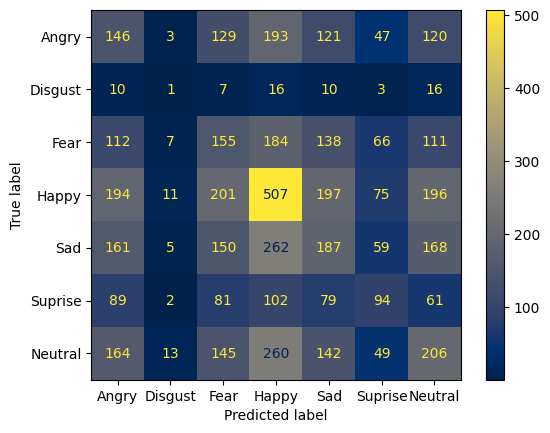

0.19522177738919472

In [ ]:
dtr_pred_2 = dtr_model_2.predict(X_val_2)
display(calculate_performance(y_val_2, dtr_pred_2, class_label))

> # kNN model:

## Original Data:

Precision [0.31016043 0.3442623  0.32021467 0.41258318 0.32665832 0.40645161
 0.28666175]
Recall [0.22924901 0.33333333 0.23156533 0.49384504 0.26310484 0.37204724
 0.39734423]
Accuracy 0.3473877176901925
F1 [0.26363636 0.33870968 0.26876877 0.44957152 0.29145729 0.38848921
 0.33304795]
Classification report: 
               precision    recall  f1-score   support

           0       0.31      0.23      0.26       759
           1       0.34      0.33      0.34        63
           2       0.32      0.23      0.27       773
           3       0.41      0.49      0.45      1381
           4       0.33      0.26      0.29       992
           5       0.41      0.37      0.39       508
           6       0.29      0.40      0.33       979

    accuracy                           0.35      5455
   macro avg       0.34      0.33      0.33      5455
weighted avg       0.35      0.35      0.34      5455

Confusion matrix: 
 [[174   6  79 185 112  33 170]
 [  8  21   3   8   4   7  12]
 [ 71   

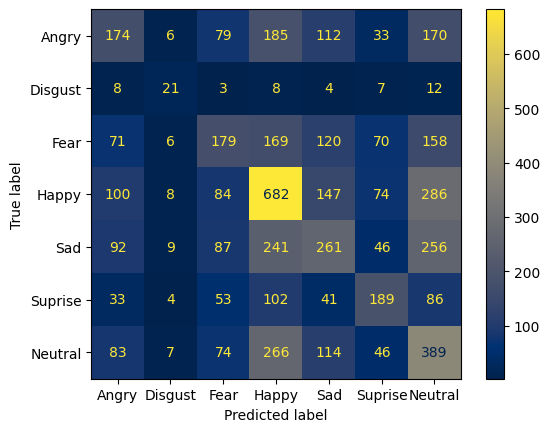

0.33338296754821073

In [ ]:
knn_pred_1 = knn_model_1.predict(X_val_1)
display(calculate_performance(y_val_1, knn_pred_1, class_label))

## Transformed data:

Precision [0.32       0.2972973  0.32090762 0.38530566 0.33967047 0.41797753
 0.29908104]
Recall [0.23188406 0.34920635 0.25614489 0.4974656  0.27016129 0.36614173
 0.36567926]
Accuracy 0.3473877176901925
F1 [0.26890756 0.32116788 0.28489209 0.43426043 0.30095452 0.39034627
 0.32904412]
Classification report: 
               precision    recall  f1-score   support

           0       0.32      0.23      0.27       759
           1       0.30      0.35      0.32        63
           2       0.32      0.26      0.28       773
           3       0.39      0.50      0.43      1381
           4       0.34      0.27      0.30       992
           5       0.42      0.37      0.39       508
           6       0.30      0.37      0.33       979

    accuracy                           0.35      5455
   macro avg       0.34      0.33      0.33      5455
weighted avg       0.35      0.35      0.34      5455

Confusion matrix: 
 [[176   6  71 224 100  32 150]
 [  5  22   0  13   5   6  12]
 [ 74   

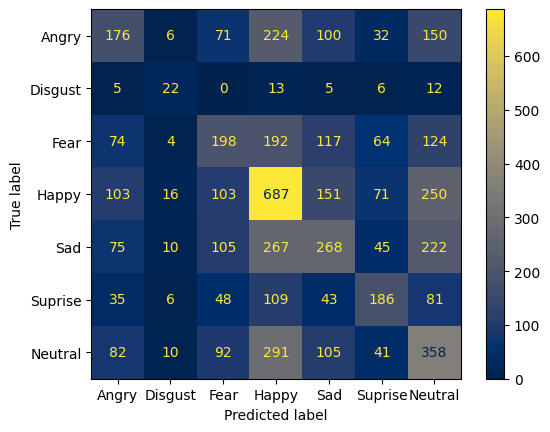

0.332796124986351

In [ ]:
knn_pred_2 = knn_model_2.predict(X_val_2)
display(calculate_performance(y_val_2, knn_pred_2, class_label))

> # Naive Bayes model:

## Original data:

Precision [0.26356589 0.02377622 0.24590164 0.39193548 0.25336323 0.15594329
 0.23584906]
Recall [0.04479578 0.26984127 0.05821475 0.17595945 0.34173387 0.56299213
 0.15321757]
Accuracy 0.20421631530705775
F1 [0.07657658 0.0437018  0.09414226 0.24287856 0.29098712 0.2442357
 0.18575851]
Classification report: 
               precision    recall  f1-score   support

           0       0.26      0.04      0.08       759
           1       0.02      0.27      0.04        63
           2       0.25      0.06      0.09       773
           3       0.39      0.18      0.24      1381
           4       0.25      0.34      0.29       992
           5       0.16      0.56      0.24       508
           6       0.24      0.15      0.19       979

    accuracy                           0.20      5455
   macro avg       0.22      0.23      0.17      5455
weighted avg       0.27      0.20      0.19      5455

Confusion matrix: 
 [[ 34  92  30  71 234 228  70]
 [  1  17   0   3  14  24   4]
 [ 18 10

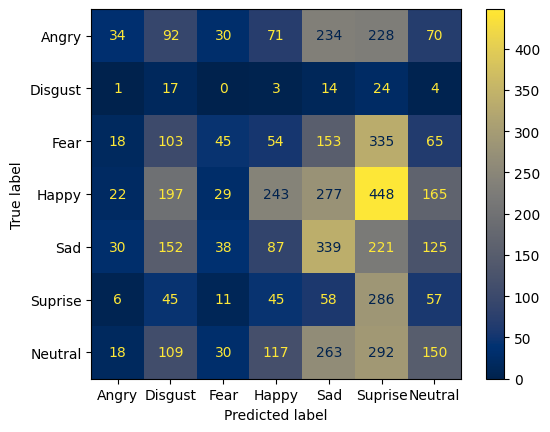

0.1683257900825783

In [ ]:
naive_pred_1 = naive_model_1.predict(X_val_1)
display(calculate_performance(y_val_1, naive_pred_1, class_label))

## Transformed data:

Precision [0.28409091 0.032      0.27725857 0.36424073 0.28840125 0.39356436
 0.3147929 ]
Recall [0.09881423 0.06349206 0.11513583 0.75380159 0.18548387 0.31299213
 0.27170582]
Accuracy 0.3332722273143905
F1 [0.14662757 0.04255319 0.16270567 0.49115357 0.22576687 0.34868421
 0.29166667]
Classification report: 
               precision    recall  f1-score   support

           0       0.28      0.10      0.15       759
           1       0.03      0.06      0.04        63
           2       0.28      0.12      0.16       773
           3       0.36      0.75      0.49      1381
           4       0.29      0.19      0.23       992
           5       0.39      0.31      0.35       508
           6       0.31      0.27      0.29       979

    accuracy                           0.33      5455
   macro avg       0.28      0.26      0.24      5455
weighted avg       0.32      0.33      0.29      5455

Confusion matrix: 
 [[  75   18   46  352   93   45  130]
 [   3    4    2   33    7   10 

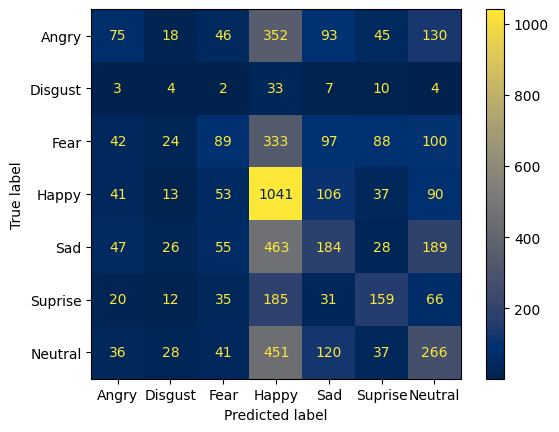

0.2441653924375094

In [ ]:
naive_pred_2 = naive_model_2.predict(X_val_2)
display(calculate_performance(y_val_2, naive_pred_2, class_label))

# Best model
Sau khi in ra các metrics cho các mô hình, ta thấy rằng mô hình kNN cho kết quả tốt nhất với F1 score. Ngoài ra accuarary score lần lượt trên tập data gốc và data PCA là 0.35 và 0.36. Suy ra ta chọn model kNN là model tốt nhất.


Precision [0.35119048 0.43181818 0.33514986 0.43857918 0.33567839 0.4226087
 0.30150463]
Recall [0.2513312  0.38383838 0.25334706 0.48980716 0.28817947 0.38694268
 0.43129139]
Accuracy 0.367649215427482
F1 [0.29298572 0.40641711 0.28856305 0.4627798  0.31012071 0.40399002
 0.35490463]
Classification report: 
               precision    recall  f1-score   support

           0       0.35      0.25      0.29       939
           1       0.43      0.38      0.41        99
           2       0.34      0.25      0.29       971
           3       0.44      0.49      0.46      1815
           4       0.34      0.29      0.31      1159
           5       0.42      0.39      0.40       628
           6       0.30      0.43      0.35      1208

    accuracy                           0.37      6819
   macro avg       0.37      0.35      0.36      6819
weighted avg       0.37      0.37      0.36      6819

Confusion matrix: 
 [[236   7  87 227 129  56 197]
 [  4  38   9  19  10   7  12]
 [ 93   8 

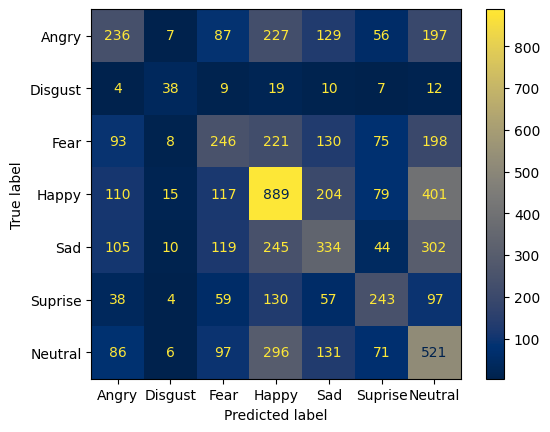

0.3599658643209493

In [ ]:
best_model_1 = knn_model_1.fit(X_temp_1, y_temp_1)
pred_1 = best_model_1.predict(X_test_1)
display(calculate_performance(y_test_1, pred_1, class_label))

Precision [0.33755274 0.37234043 0.33900524 0.42013233 0.33640082 0.42732049
 0.30662461]
Recall [0.25559105 0.35353535 0.26673532 0.48980716 0.2838654  0.38853503
 0.40231788]
Accuracy 0.3639829887080217
F1 [0.29090909 0.3626943  0.29855908 0.45230221 0.30790828 0.40700584
 0.34801289]
Classification report: 
               precision    recall  f1-score   support

           0       0.34      0.26      0.29       939
           1       0.37      0.35      0.36        99
           2       0.34      0.27      0.30       971
           3       0.42      0.49      0.45      1815
           4       0.34      0.28      0.31      1159
           5       0.43      0.39      0.41       628
           6       0.31      0.40      0.35      1208

    accuracy                           0.36      6819
   macro avg       0.36      0.35      0.35      6819
weighted avg       0.36      0.36      0.36      6819

Confusion matrix: 
 [[240  12  86 234 133  48 186]
 [  6  35   9  22   5   5  17]
 [ 96   

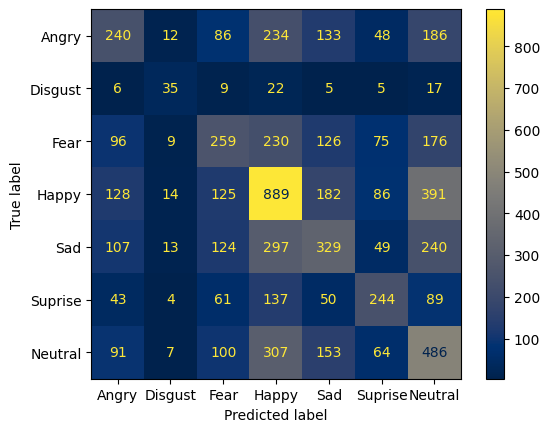

0.35248452751690257

In [ ]:
best_model_2 = knn_model_2.fit(X_temp_2, y_temp_2)
pred_2 = best_model_2.predict(X_test_2)
display(calculate_performance(y_test_2, pred_2, class_label))

> # Identifying the most accurate emotion category and the one with the most errors:
## **Answer question 4:**
### Để nhận dạng xem biểu tượng cảm xúc nào là chính xác, hay rủi ro nhất, ta dựa theo điểm f1, do điểm f1 cung cấp một thước đo cân bằng giữa độ chính xác của các dự đoán dương tính và khả năng phát hiện ra trường hợp dương tính, vì vậy:
* ### The most accurate: cảm xúc mang nhãn số 3 "Happy".
* ### The most errors: cảm xúc mang nhãn số 0 "Angry".